# Text Analysis of Titles Descriptions and Tags

In [52]:
import pandas as pd
import numpy as np
import re
import datetime  
import matplotlib.pyplot as plt
import seaborn as sns

#natural language toolkit for list of stop words
import nltk 
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('data/mergedData033122.csv')

## Titles and Descriptions

In [3]:
#make all title and descriptions lowercase
title = data['title_x'].str.lower()
desc = data['description'].str.lower()

In [4]:
#look at some titles
title.head(5)

0    handmade pottery vessel sinks mashima stamped ...
1    handmade pottery vessel sinks mishima stamped ...
2    custom small white oval handmade pottery vesse...
3    custom handmade blue pottery vessel sink, desi...
4    carved stoneware cup, wheel thrown mug, coffee...
Name: title_x, dtype: object

In [5]:
#look at some descriptions
desc.head(5)

0    vessel bathroom sink &quot;with no overflow&qu...
1    vessel bathroom sink &quot;with no overflow&qu...
2    oval vessel bathroom sink &quot;with no overfl...
3    this sink&#39;s got the blues\nyou get to choo...
4    carved red stoneware mug has full round shape ...
Name: description, dtype: object

### Looking at listings that contain specific products of interest

In [6]:
# function that returns percentage of listings that contain a specific word

def percentage_item(text, word):
    true = text[text.str.contains(' ' + word + ' ')==True]
    percent = len(true)/len(text)
    return percent

In [7]:
#percentage of listings that contain the word "mug" in the TITLE
percentage_item(title, "mug")

0.11891666666666667

In [8]:
#percentage of listings that contain the word "mug" in the DESCRIPTION
percentage_item(desc, "mug")

0.19291666666666665

In [9]:
#percentage of listings that contain a specific product in their title and description

items = ['mug', 'plate', 'bowl', 'jar', 'planter', 'berry bowl', 'butter dish', 'cup', 'tumbler', 'bacon cooker', 'spoon rest']

for i in items:
    print(i, percentage_item(title, i), percentage_item(desc, i))


mug 0.11891666666666667 0.19291666666666665
plate 0.024833333333333332 0.05383333333333333
bowl 0.07675 0.13108333333333333
jar 0.017083333333333332 0.019333333333333334
planter 0.01425 0.018166666666666668
berry bowl 0.0009166666666666666 0.0010833333333333333
butter dish 0.00225 0.0025833333333333333
cup 0.06691666666666667 0.11041666666666666
tumbler 0.00975 0.012666666666666666
bacon cooker 8.333333333333333e-05 0.0003333333333333333
spoon rest 0.00625 0.012083333333333333


### Remove punctuation, special characters and stop words from the titles and descriptons

In [10]:
# function that removes "\n", links, as well as special characters and numbers fromt text
def clean_text(text):
    for i in range (0, len(text)):
        n = '\n'
        string = text[i]
        if n in string:
            string = string.replace(n, " ")
            text[i] = string
        text[i] = re.sub("[^A-za-z]+"," ", text[i])
        text[i] = re.sub(r"http\S+","",text[i])
        text[i] = re.sub(r"www\S+","",text[i])

In [11]:
# Clean descriptions and titles
clean_text(desc)
clean_text(title)

In [12]:
#split the title strings on the spaces
title = title.str.split(" ")
desc = desc.str.split(" ")

In [13]:
## define the stopwords
stop = stopwords.words('english')

In [14]:
#add pottery-related keywords, and other irrelevant words to stopwords
stop.extend(['handmade','stoneware','pottery','ceramic','clay','x', '|','cm', 'oz', 'ml', ' ', '', 'www', 'com',
'shipping','item','items','hand','made','piece','pieces','make','please','one','use','may','inches','also',
'high','etsy', 'quot', 'wheel', 'thrown', 'wheelthrown'])

### TO DO: GET THIS FUNCTION TO WORK 
I dont know if this is worth the time to fix, maybe just keep the for loops for now

In [16]:
#### TO DO: Turn this into a function (This function isn't working, fix later)
""" 
Args:
txt (series): the text as a series of lists
wrds (list): the stopwords to be removed from the list


"""
def remove_stopwords(txt, wrds):
    txt = txt.reset_index(drop=True) #reset the index
    for i in range (0, len(txt)):
        for s in wrds:
            list = txt[i]
            list = [w for w in list if w != s]
            txt[i] = list

In [17]:
#test = desc.iloc[11995:]
#test = test.reset_index(drop=True)

### Keeping these here for now but I really want the function to work with everything

In [18]:
# remove all instances of the stop words from the descriptions
for i in range (0, len(desc)):
    for s in stop:
        list = desc[i]
        list = [w for w in list if w != s]
        desc[i] = list

In [19]:
# remove all instances of the stop words from the titles
for i in range (0, len(title)):
    for s in stop:
        list = title[i]
        list = [w for w in list if w != s]
        title[i] = list

In [20]:
desc

0        [vessel, bathroom, sink, overflow, color, show...
1        [vessel, bathroom, sink, overflow, sizes, wide...
2        [oval, vessel, bathroom, sink, overflow, white...
3        [sink, got, blues, get, choose, shade, blue, s...
4        [carved, red, mug, full, round, shape, handle,...
                               ...                        
11995    [second, choice, product, handthrown, bowl, be...
11996    [hi, dear, friends, vintage, ashtray, traditio...
11997    [super, quality, vintage, french, pitcher, jug...
11998    [adorable, cat, cups, perfect, favorite, drink...
11999    [beautiful, grey, vase, unique, tones, white, ...
Name: description, Length: 12000, dtype: object

In [21]:
title

0        [vessel, sinks, mashima, stamped, design, wide...
1        [vessel, sinks, mishima, stamped, design, whit...
2        [custom, small, white, oval, vessel, sinks, de...
3        [custom, blue, vessel, sink, designed, bathroo...
4        [carved, cup, mug, coffee, mug, mug, cup, hand...
                               ...                        
11995              [rustic, bowl, second, choice, product]
11996    [vintage, ashtray, bulgarian, painted, vintage...
11997    [french, pitcher, beautiful, studio, wine, car...
11998                 [cat, cup, mug, white, glaze, light]
11999    [vase, flowers, home, decor, bedroom, country,...
Name: title_x, Length: 12000, dtype: object

### Save the cleaned descriptions and titles to csv to use for clustering algorithm

In [22]:
title.to_csv('data/titles-cleaned033122.csv')
desc.to_csv('data/descriptions-cleaned033122.csv')

### Word Counts

In [23]:
#define a function that reduces a column to a 1-dimensional series (to get word counts)
def oneD(column):
 return pd.Series([x for list in column for x in list])

In [24]:
#get the value counts for each of the words in the description
descWordCounts = oneD(desc).value_counts()

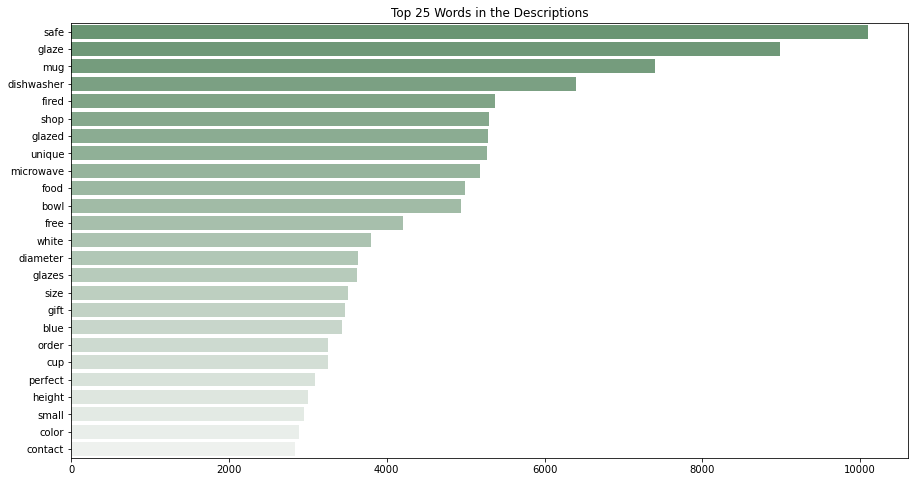

In [138]:
# Sort top words in the descriptions
top25desc = descWordCounts.head(25).sort_values(ascending=False)

plt.figure(figsize = (15,8))

p = sns.barplot(x=top25desc.values, y=top25desc.index, palette='light:#639c6f_r').set(title='Top 25 Words in the Descriptions')

In [26]:
#get the value counts for each of the words in the titles
titleWordCounts = oneD(title).value_counts()

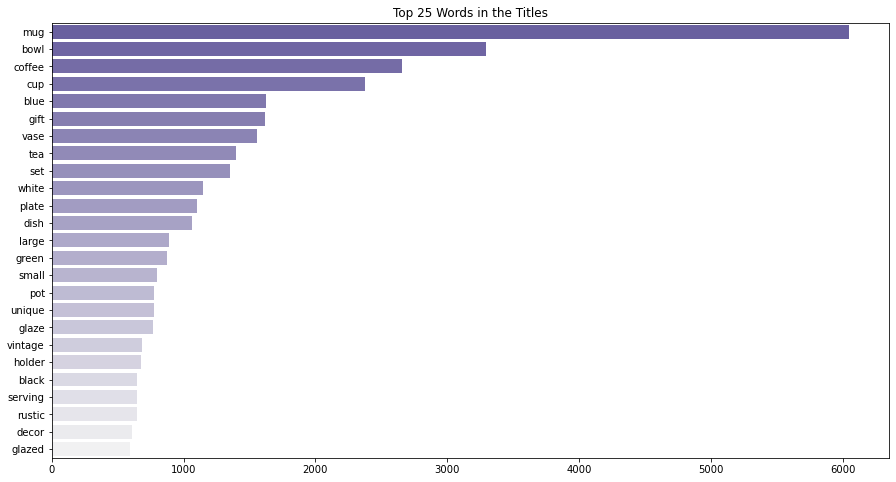

In [109]:
#look at top 25 words in the titles
top25title = titleWordCounts.head(25).sort_values(ascending=False)

plt.figure(figsize = (15,8))

p = sns.barplot(x=top25title.values, y=top25title.index, palette='light:#6255aa_r').set(title='Top 25 Words in the Titles')

## Tags

In [28]:
#make all tags lowercase
data['tags'] = data['tags'].str.lower()

In [29]:
#transform tags column from strings to lists
data['tags'] = data['tags'].apply(eval)

In [31]:
#get just the tags
tags = data['tags']

### Remove pottery-related stopwords from the tags

In [32]:
#define common stopwords
stopTags = ['handmade','stoneware','pottery','ceramic','clay','handmade pottery','stoneware pottery','ceramics','handmade ceramics']

In [33]:
#remove stop words from tags
for i in range (0, len(tags)):
    for s in stopTags:
        tags_list = tags[i]
        if s in tags_list:
            tags_list.remove(s)

In [68]:
#add clean tags to original df
data['clean_tags'] = tags

In [35]:
#get the value counts for each of the tags
tagCounts = oneD(tags).value_counts()

In [139]:
# Sort the top tags overall
top25 = tagCounts.head(25).sort_values(ascending=False)

In [50]:
# the word "spoon" is appearing in the top words in the titles so I wanted to see what the related tags are:
tagCounts[tagCounts.index.str.contains(pat = 'spoon')]

spoon rest                     164
ceramic spoon rest              53
spoon holder                    40
spoonrest                       38
pottery spoon rest              38
                              ... 
spoon rest handmade              1
functional spoon                 1
owl spoon rest                   1
porcelain small spoon table      1
scooper spoon                    1
Length: 260, dtype: int64

#### I repeated the above for all the top words in the titles that were products so I could see if they were normally used in a phrase like "spoon rest" rather than individually and used this later on in the "Business Information" notebook

### Get top 20 tags for top-favorited and top rated shops

In [39]:
#dataframe with tags, num of favorites
itemData = data[['listing_id','clean_tags','num_favorers_x']]

In [40]:
#look at top 25 listings according to number of favorers
itemData.sort_values(by = ['num_favorers_x'], ascending = False).head(25)

,listing_id,clean_tags,num_favorers_x
2679,175789619,"[best selling mug, gift under 50, gift for dad...",26374
551,792180615,"[ceramic mug, handpainted mug, nature mug, flo...",13334
1611,900330801,"[wheel thrown pottery, fine art ceramics, dini...",12995
759,1086863643,"[caffeine addict, coffee lover, gift for mom, ...",10207
3692,535025569,"[coffee cup, parceline, tea cup, coffee mug, c...",9671
6160,741218574,"[handmade ceramic mug, handmade mug, ceramic m...",8259
2317,128982522,"[etsymudteam, claylicious, stoneware berry bow...",7926
2114,677424431,"[handmade coffee mug, birthday gift mug, coffe...",7820
1835,635135322,"[platter, serving platter, gray, wabi sabi, mo...",7412
3099,614766345,"[pottery mug, black and white, turquoise, coff...",7317


In [41]:
#this is the 3,873 listings with at least 10 favorers
TenOrMore = itemData[itemData['num_favorers_x']>=10]
#TenOrMore.shape

In [42]:
#get the value counts for each of the tags in TenOrMore
tagCountsFavs = oneD(TenOrMore["clean_tags"]).value_counts()

In [140]:
# Sort the top 25 tags from the listings with ten or more favorers
top25Favs = tagCountsFavs.head(25).sort_values(ascending=False)

### Get top 25 tags for top-rated shops (greater than 4.8) with at least 10 reviews

In [87]:
# dataframe with tags, shop review count, and review average
shopData = data[['listing_id','clean_tags','num_favorers_x','review_average', 'review_count']]

In [84]:
# get the shops that have at least 10 reviews
shops10reviews = shopData[shopData['review_count']>=10]

In [136]:
#this is the 9036 listings from shops with at least 10 reviews
TenReviews =  shopData[shopData['review_count']>=10]

,listing_id,clean_tags,num_favorers_x,review_average,review_count
0,714343468,"[home decor, decoration, jeff brown pottery, s...",70,4.9244,119.0
1,894517412,"[home decor, decoration, jeff brown pottery, s...",13,4.9244,119.0
2,1123047691,"[home decor, decoration, jeff brown pottery, s...",2,4.9244,119.0
3,965181802,"[home decor, decoration, jeff brown pottery, s...",26,4.9244,119.0
4,819231044,"[little pig pottery, coffee cup, tea cup, ston...",3,4.9375,16.0
...,...,...,...,...,...
11980,1050331125,[],0,4.9487,39.0
11983,921220341,"[studio pottery, pottery bowls, bowl set, pott...",2,5.0000,88.0
11997,1182460178,"[french stoneware jug, stoneware pitcher, ston...",3,4.9556,225.0
11998,1046336443,"[white, gloss, glossy, cereal, soup, salad, pl...",7,4.9722,36.0


In [155]:
# this is the 8106 listings from shops with at least 10 reviews AND a 4.8 star rating or higher
topShops =  TenReviews[TenReviews['review_average']>=4.9]

In [157]:
#get the value counts for each of the tags in the topShops listings
tagCountsTopShops = oneD(topShops["clean_tags"]).value_counts()

# Sort the top 25 tags from the listings with ten or more favorers
top25TopShops = tagCountsTopShops.head(25).sort_values(ascending=False)

Text(0.5, 1.0, 'Top 25 Tags for Listings w/10 or more Favorers')

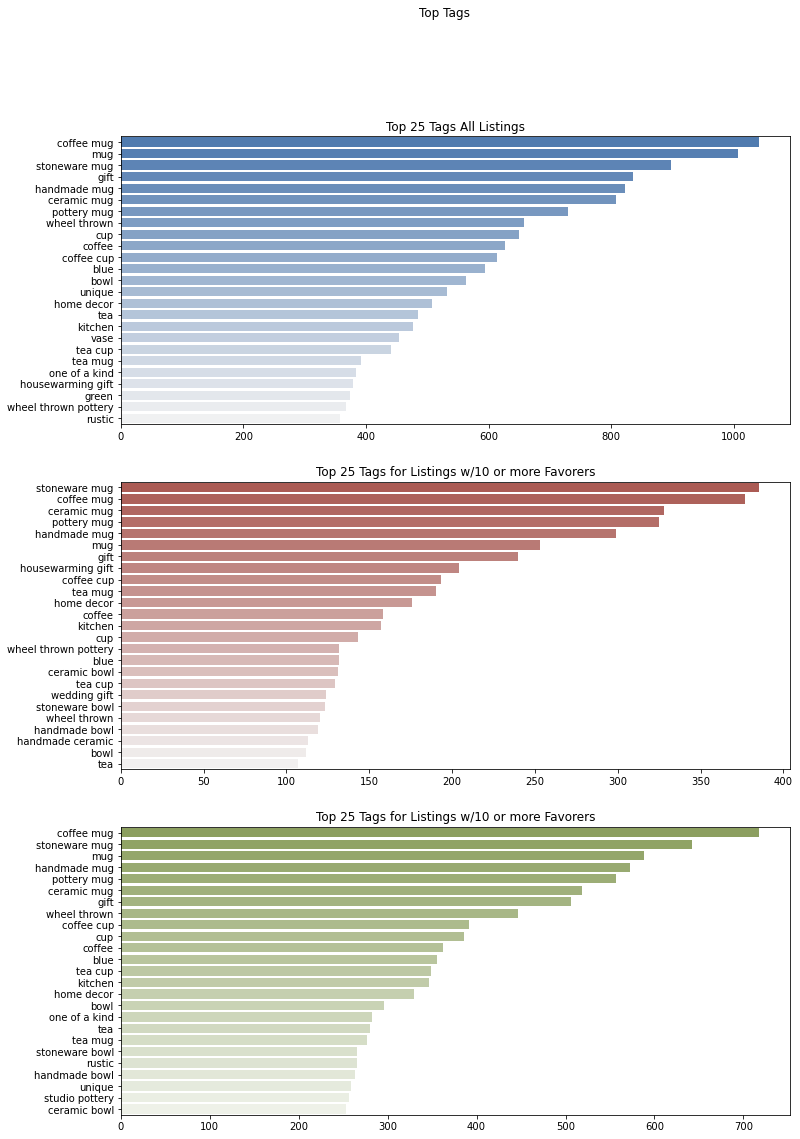

In [158]:
# plot top tags in different subsets of the data
fig, axes = plt.subplots(3, 1, figsize = (12, 18))
fig.suptitle('Top Tags')

# plot all the top tags overall
sns.barplot(ax=axes[0], x=top25.values, y=top25.index, palette='light:#4079bf_r')
axes[0].set_title('Top 25 Tags All Listings')

# plot the top tags for listings with 10 or more favorers
sns.barplot(ax=axes[1], x=top25Favs.values, y=top25Favs.index, palette='light:#b94f46_r')
axes[1].set_title('Top 25 Tags for Listings w/10 or more Favorers')

# plot the top tags for listings from shops with at least 10 reviews and a 4.9 star rating or higher
sns.barplot(ax=axes[2], x=top25TopShops.values, y=top25TopShops.index, palette='light:#90aa55_r')
axes[2].set_title('Top 25 Tags for Listings w/10 or more Favorers')